In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
weather_api_key

'b6ab7dc73585b48469f752defd783185'

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['lata',
 'chuy',
 'severo-kurilsk',
 'pevek',
 'belushya guba',
 'taolanaro',
 'punta arenas',
 'ilulissat',
 'khatanga',
 'qaanaaq',
 'busselton',
 'kavieng',
 'hithadhoo',
 'castro',
 'yellowknife',
 'lebu',
 'jamestown',
 'cape town',
 'solnechnyy',
 'muriti',
 'taltal',
 'armacao dos buzios',
 'ranong',
 'atbasar',
 'albany',
 'umm jarr',
 'pyapon',
 'chokurdakh',
 'agadez',
 'saleaula',
 'havre-saint-pierre',
 'quatre cocos',
 'hermanus',
 'norman wells',
 'carnarvon',
 'muzhi',
 'talnakh',
 'sergeyevka',
 'barrow',
 'hofn',
 'cabo san lucas',
 'hilo',
 'kavaratti',
 'sitka',
 'zirgan',
 'san quintin',
 'ushuaia',
 'atuona',
 'belmonte',
 'bluff',
 'turukhansk',
 'hasaki',
 'hambantota',
 'vaini',
 'sisophon',
 'victoria',
 'upernavik',
 'port lincoln',
 'kapaa',
 'esperance',
 'tiksi',
 'ribeira grande',
 'provideniya',
 'palabuhanratu',
 'georgetown',
 'tunxi',
 'teguise',
 'rikitea',
 'san cristobal',
 'tumannyy',
 'rungata',
 'east london',
 'kaitangata',
 'mataura',
 'sancti

Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [ ]:
# Set base url and units variables, and combine them to get the query url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

# Loop through cities
print("Beginning Data Retrieval ")
print("-----------------------------")

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Convert Raw Data to DataFrame
Export the city data into a .csv.
Display the DataFrame

In [7]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})
weather_dict


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lata,0,PT,1627492154,39,40.1629,-8.3327,91.04,11.12
1,Chui,95,UY,1627492123,76,-33.6971,-53.4616,46.09,17.27
2,Severo-Kuril'sk,100,RU,1627492190,97,50.6789,156.1250,55.26,8.01
3,Pevek,100,RU,1627492194,97,69.7008,170.3133,33.26,23.17
4,Punta Arenas,0,CL,1627492094,81,-53.1500,-70.9167,46.51,12.66
...,...,...,...,...,...,...,...,...,...
475,La Reforma,4,MX,1627492675,59,25.0833,-108.0500,94.14,2.73
476,Toila,87,EE,1627492675,69,59.4236,27.5025,72.73,3.56
477,Östersund,20,SE,1627492491,53,63.1792,14.6357,73.85,6.91
478,Storforshei,20,NO,1627492676,37,66.4043,14.5233,82.18,6.91


In [8]:
# Save city data into a csv file
weather_dict.to_csv("output_data/cities.csv", index = False)

Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.
Latitude vs. Temperature Plot
This plot is looking at the relationship between latitude and temperature. It shows that as you aprroach the equator (latitude 0) the temperature gets hotter

### Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.


### Latitude vs. Temperature Plot

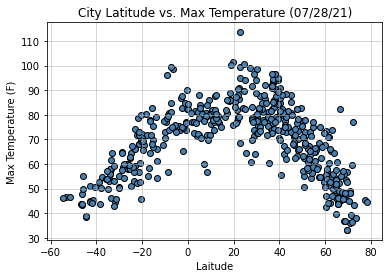

In [12]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (07/28/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Max Temperature.png")

Highest temperature is found at 20 latitude and as the latidude increases or decreases, temperature drops

### Latitude vs. Humidity Plot

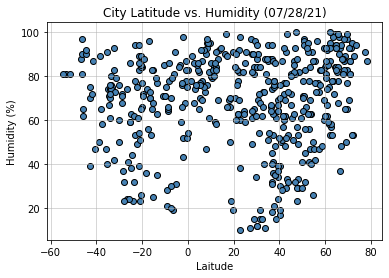

In [13]:
# Create Latitude vs. Humidity Plot scatter plot
lt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (07/28/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Humidity.png")

### Latitude vs. Cloudiness Plot

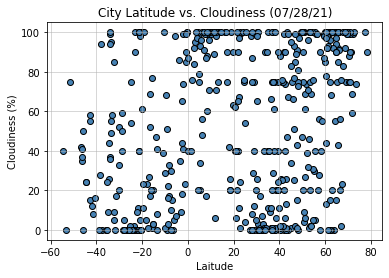

In [14]:
# Create Latitude vs. Cloudiness Plot 
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (07/28/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Cloudiness.png")

Cloudiness data is widely spread across the latitude.

### Latitude vs. Wind Speed Plot

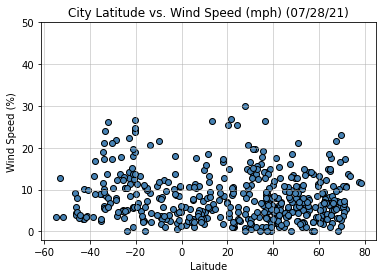

In [15]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (07/28/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Wind Speed (mph).png")